In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
df = pd.read_csv("drug200.csv")

In [277]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [278]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [279]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [280]:
dummies = pd.get_dummies(df['Sex'], prefix='Sex').astype(int)

df = df.drop('Sex', axis=1)

df = pd.concat([df, dummies], axis=1)

In [281]:
dummies = pd.get_dummies(df['BP'], prefix='BP').astype(int)

df = df.drop('BP', axis=1)

df = pd.concat([df, dummies], axis=1)

In [282]:
dummies = pd.get_dummies(df['Cholesterol'], prefix='Cholesterol').astype(int)

df = df.drop('Cholesterol', axis=1)

df = pd.concat([df, dummies], axis=1)

In [283]:
dummies = pd.get_dummies(df['Drug'], prefix='Drug').astype(int)

df = df.drop('Drug', axis=1)

df = pd.concat([df, dummies], axis=1)

In [284]:
df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,0,1,0
196,16,12.006,0,1,0,1,0,1,0,0,0,0,1,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,0,1
198,23,14.020,0,1,0,0,1,0,1,0,0,0,0,1


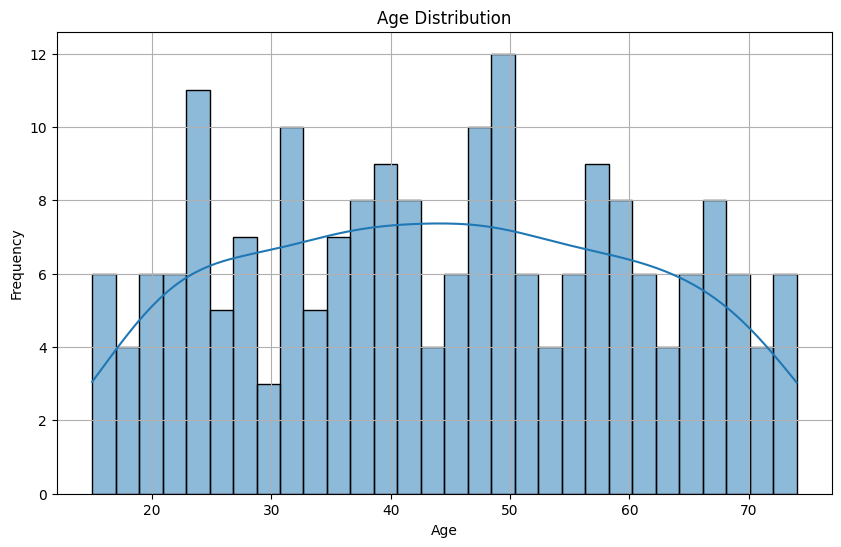

In [285]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [286]:
def group(Age):
    if Age <=18:
        return 'Child'
    elif Age <=35:
        return 'Youth'
    elif Age <=55 :
        return 'Middle Age'
    elif Age <=75:
        return 'Late Adulthood'
    else:
        return 'Old Age'


df['Age_group'] = df['Age'].apply(group)

In [287]:
df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Age_group
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0,Youth
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0,Middle Age
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0,Middle Age
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1,Youth
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0,Late Adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,0,1,0,Late Adulthood
196,16,12.006,0,1,0,1,0,1,0,0,0,0,1,0,Child
197,52,9.894,0,1,0,0,1,1,0,0,0,0,0,1,Middle Age
198,23,14.020,0,1,0,0,1,0,1,0,0,0,0,1,Youth


In [288]:
dummies = pd.get_dummies(df['Age_group'], prefix='Age_group').astype(int)

df = df.drop('Age_group', axis=1)

df = pd.concat([df, dummies], axis=1)

In [289]:
df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Age_group_Child,Age_group_Late Adulthood,Age_group_Middle Age,Age_group_Youth
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
196,16,12.006,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
198,23,14.020,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1


# Na_to_k 이상치 확인&제거

<function matplotlib.pyplot.show(close=None, block=None)>

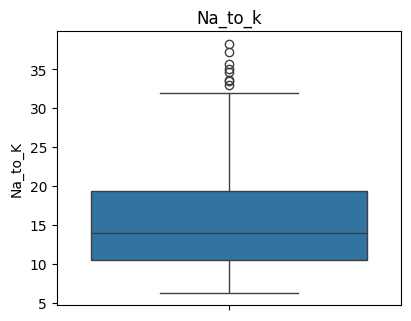

In [290]:
plt.figure(figsize=(15, 15))
plt.subplot(5,4,1)
sns.boxplot(y=df['Na_to_K'])
plt.title('Na_to_k')
plt.tight_layout()
plt.show

In [291]:
df = df[df['Na_to_K'] < 30]

<function matplotlib.pyplot.show(close=None, block=None)>

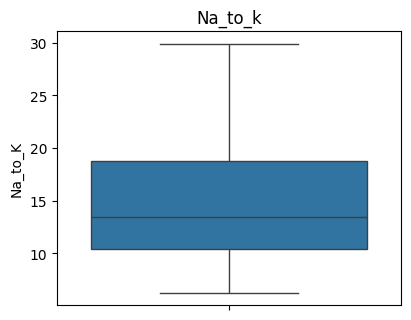

In [292]:
plt.figure(figsize=(15, 15))
plt.subplot(5,4,1)
sns.boxplot(y=df['Na_to_K'])
plt.title('Na_to_k')
plt.tight_layout()
plt.show

In [293]:
df['Age_Na_to_K_interaction'] = df['Age'] * df['Na_to_K']

<ipython-input-293-d7d7c7f6cc24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Na_to_K_interaction'] = df['Age'] * df['Na_to_K']


In [294]:
#df['Drug'] = df['Drug'].astype('category')

In [295]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Drug'] = le.fit_transform(df['Drug'])

In [296]:
df.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Age_group_Child,Age_group_Late Adulthood,Age_group_Middle Age,Age_group_Youth,Age_Na_to_K_interaction
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,583.165
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,615.371
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,475.358
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,218.344
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1100.623


In [297]:
X = df.drop(['Drug_DrugY', 'Drug_drugA', 'Drug_drugB', 'Drug_drugC','Drug_drugX'], axis=1)

y = df[['Drug_DrugY',	'Drug_drugA',	'Drug_drugB',	'Drug_drugC','Drug_drugX']]

In [298]:
# X = df.drop('Drug', axis=1)

# y = df['Drug']

In [299]:
X

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_group_Child,Age_group_Late Adulthood,Age_group_Middle Age,Age_group_Youth,Age_Na_to_K_interaction
0,23,25.355,1,0,1,0,0,1,0,0,0,0,1,583.165
1,47,13.093,0,1,0,1,0,1,0,0,0,1,0,615.371
2,47,10.114,0,1,0,1,0,1,0,0,0,1,0,475.358
3,28,7.798,1,0,0,0,1,1,0,0,0,0,1,218.344
4,61,18.043,1,0,0,1,0,1,0,0,1,0,0,1100.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,1,0,0,647.752
196,16,12.006,0,1,0,1,0,1,0,1,0,0,0,192.096
197,52,9.894,0,1,0,0,1,1,0,0,0,1,0,514.488
198,23,14.020,0,1,0,0,1,0,1,0,0,0,1,322.460


In [300]:
y

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


# DecisionTreeClassifier

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [302]:
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)




In [303]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [304]:
predictions

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [305]:
Accuracy = accuracy_score(y_test, predictions)
print("Accuracy : ", Accuracy)

Accuracy :  0.9736842105263158


# Xgboost

In [306]:
# 모델 초기화 및 훈련
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9473684210526315


# Lightgbm

In [307]:
! pip install --upgrade lightgbm


In [308]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# LightGBM 모델 훈련 및 평가를 위한 함수
def train_and_evaluate_lgb(X_train, X_test, y_train, y_test):
    accuracies = []
    for column in y_train.columns:
        lgb_train = lgb.Dataset(X_train, y_train[column])
        lgb_eval = lgb.Dataset(X_test, y_test[column], reference=lgb_train)

        # LightGBM 파라미터 설정
        params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'binary_logloss',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }

        # 모델 학습
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_eval],

        )


        # 예측
        y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
        y_pred_binary = (y_pred >= 0.5).astype(int)  # 확률을 이진 값으로 변환

        # 정확도 계산
        acc = accuracy_score(y_test[column], y_pred_binary)
        accuracies.append(acc)
        print(f'Accuracy for {column}: {acc:.4f}')

    # 평균 정확도 출력
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f'\nAverage Accuracy: {average_accuracy:.4f}')




In [309]:
# 모델 훈련 및 평가 실행
train_and_evaluate_lgb(X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War